In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns; sns.set()

1.Give a simple dataset

In [102]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [103]:
v = vec.fit(simple_train)
x = CountVectorizer()
print(v.get_feature_names())

['cab', 'call', 'me', 'please', 'tonight', 'you']


In [104]:
#3transform matrix
x = vec.transform(simple_train)
x

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [105]:
#4
print(x)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [106]:
#5 convert to dense matrix
y=x.toarray()
y

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [107]:
#6 
pd.DataFrame(y, columns=vec.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [108]:
#7
simple_test = ["please don't call me"]
a = vec.transform(simple_test)
b= a.toarray()
b

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [109]:
#8
pd.DataFrame(b, columns=vec.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [110]:
#9
column_names = ['label','message']
df = pd.read_csv("sms.tsv", sep='\t',names = column_names)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
#10
df['label'] = df.label.map({'ham': 0, 'spam': 1})
df

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [112]:
X = df.message
Y = df.label
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object
0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64


In [113]:
#12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)
print(X_train.shape)
print (X_test.shape)

(4179,)
(1393,)


In [114]:
#13
vec = CountVectorizer()

In [89]:
#14
X_train_dtm = vec.fit_transform(X_train)
X_train_dtm

<4179x7429 sparse matrix of type '<class 'numpy.int64'>'
	with 55448 stored elements in Compressed Sparse Row format>

In [90]:
#15
X_test_dtm = vec.transform(X_test)
X_test_dtm

<1393x7429 sparse matrix of type '<class 'numpy.int64'>'
	with 17323 stored elements in Compressed Sparse Row format>

In [116]:
#16
m = MultinomialNB()
m.fit(X_train_dtm, Y_train)

MultinomialNB()

In [118]:
#17
Y_pred = m.predict(X_test_dtm)
print("model Accuracy :" ,accuracy_score(Y_test, Y_pred))

model Accuracy : 0.9877961234745154


In [121]:
#18
metrics.confusion_matrix(Y_test, Y_pred)

array([[1194,    3],
       [  14,  182]], dtype=int64)

In [124]:
#19 false positibe
fp= X_test[Y_test<Y_pred]
fp

4382               Mathews or tait or edwards or anderson
1082                    Can u get pic msgs to your phone?
1260    We have sent JD for Customer Service cum Accou...
Name: message, dtype: object

In [127]:
#20false negative
fn= print(X_test[Y_test > Y_pred])
fn

1269    Can U get 2 phone NOW? I wanna chat 2 set up m...
955             Filthy stories and GIRLS waiting for your
3302             RCT' THNQ Adrian for U text. Rgds Vatian
4298    thesmszone.com lets you send free anonymous an...
5427    Santa Calling! Would your little ones like a c...
3530    Xmas & New Years Eve tickets are now on sale f...
2402    Babe: U want me dont u baby! Im nasty and have...
2823    ROMCAPspam Everyone around should be respondin...
869     Hello. We need some posh birds and chaps to us...
1638    0A$NETWORKS allow companies to bill for SMS, s...
1875    Would you like to see my XXX pics they are so ...
1458    CLAIRE here am havin borin time & am now alone...
4676    Hi babe its Chloe, how r u? I was smashed on s...
751     Do you realize that in about 40 years, we'll h...
Name: message, dtype: object


In [1]:
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
from matplotlib import rcParams

In [148]:
from sklearn.datasets import load_boston
boston = load_boston()

y = boston.target
boston1 = pd.DataFrame(boston.data)

In [9]:
#dataset  correlation
boston1.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
Q2. Label columns

In [162]:
boston1.columns = boston.feature_names
boston1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


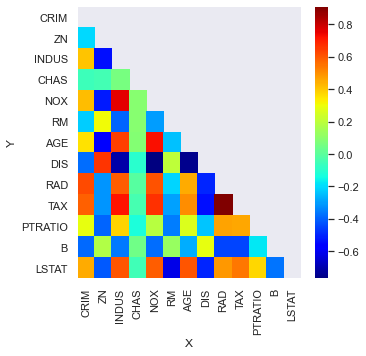

In [163]:
y=boston1.corr()
z= np.triu(y)
sn.heatmap(y, mask=z, cmap="jet")
plt.rcParams["figure.figsize"]=5,5
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

4. which feature are highly correlated which are highly uncorrelated

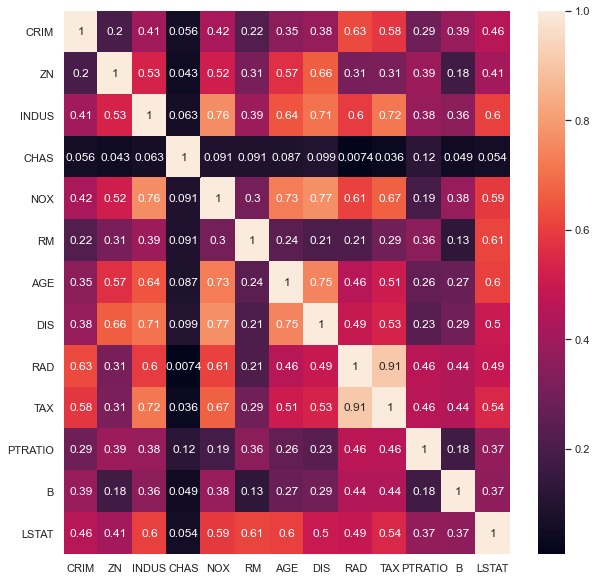

In [165]:
#features
sns.heatmap(boston1.corr().abs(), annot=True)
plt.rcParams["figure.figsize"]=10,10

In [13]:
#since highest correlation is visible by graph (to find lowest
# we use
minc=boston1.corr()
minc.to_numpy().min()


-0.7692301132258261

4. hence
Rad and Tax has highest correlation
Dis and Nox are highly unCorrelated 
where

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

nox
nitrogen oxides concentration (parts per 10 million).

dis
weighted mean of distances to five Boston employment centres.

5. regression


In [19]:
boston1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
x=boston1
print(x)

           0     1      2    3      4      5     6       7    8      9    10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  

In [46]:
#5. split data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


(404, 13)
(102, 13)
(404, 1)
(102, 1)


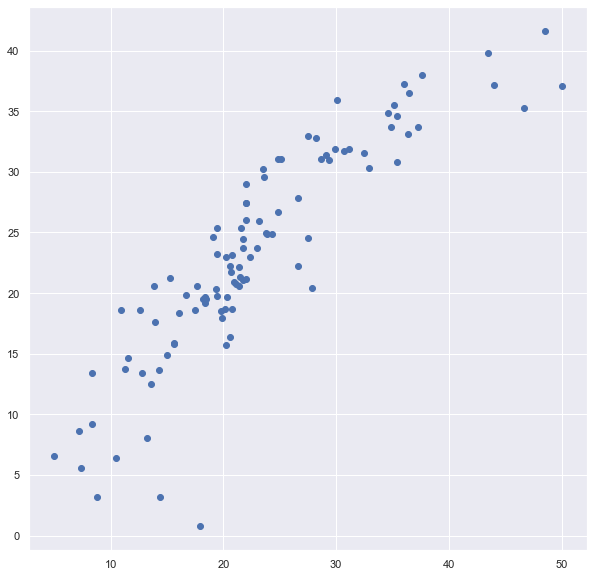

In [204]:
#split data
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
Y = pd.DataFrame(boston.target)

X_train,X_test, Y_train,Y_test = train_test_split(boston1,Y, test_size = 0.20, random_state = 2)

lr = LinearRegression()

lr.fit(X_train,Y_train)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

Y_pred = lr.predict(X_test)

plt.scatter(Y_test, Y_pred)

In [195]:
#6 predicting value in test set
y_predict = lr.predict(X_test)
print("Predition: ", y_predict)
print("y intercept",lr.intercept_)
print("Accuracy of test: " , lr.score(X_test,Y_test))
print("Accuracy of train " , lr.score(X_train,Y_train))


Predition:  [[23.1903541 ]
 [18.97985889]
 [19.82548836]
 [19.00126197]
 [ 4.39524325]
 [11.90230303]
 [21.24870187]
 [28.64449553]
 [29.03550064]
 [13.90644782]
 [ 6.41422339]
 [32.65356658]
 [18.99884691]
 [20.01569489]
 [37.15275422]
 [22.80485488]
 [29.04529555]
 [33.04200949]
 [10.48602033]
 [24.45472284]
 [21.33069324]
 [27.60222354]
 [37.52118276]
 [13.6113556 ]
 [ 9.56442243]
 [15.03368415]
 [35.5975585 ]
 [26.01017573]
 [25.52430154]
 [27.06321433]
 [19.07680237]
 [30.54746571]
 [31.27561168]
 [16.40132981]
 [39.76707419]
 [20.27263903]
 [18.94934061]
 [17.12210014]
 [21.6262832 ]
 [28.15101424]
 [26.95292863]
 [19.14352801]
 [14.50664721]
 [25.78075705]
 [18.50460146]
 [13.93439214]
 [24.96593139]
 [19.12431756]
 [20.6780475 ]
 [ 6.23807397]
 [27.71460362]
 [26.74617711]
 [11.83361779]
 [40.10855118]
 [14.66523328]
 [22.12023896]
 [20.34305401]
 [20.3786179 ]
 [23.56685605]
 [21.91582872]
 [20.79748126]
 [35.43123681]
 [17.32592458]
 [20.92077502]
 [24.1674162 ]
 [43.38199388

In [196]:
#7 coeff of regression
print('Coefficients: \n', lr.coef_)

Coefficients: 
 [[-1.29372986e-01  2.95904870e-02  2.22928425e-02  2.83744579e+00
  -1.53954203e+01  5.27557273e+00 -1.05383841e-02 -1.30170765e+00
   2.66392896e-01 -1.09686702e-02 -9.64830193e-01  1.08603361e-02
  -3.78363465e-01]]


The positive coefficient means that as the independent value increases, mean of dependent variable also increases.
The negative coefficient means that as the independent value increases, mean of dependent variable decreases.

In positive coefficient with the increase of valuse of Independent variable the mean of dependent variable is also increases
In negative coefficient with the increase of valuse of Independent variable the mean of dependent variable decreases.

In [207]:
#8
import sklearn
from sklearn.metrics import mean_squared_error
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("mean absolute error", mse)

18.49542012244846


In [210]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print("r2 score", r2)

r2 score 0.7789207451814409


In [211]:
from sklearn.metrics import mean_absolute_error
mea= mean_absolute_error(Y_test, Y_pred)
print("mean absolute error", mea)

mean absolute error 3.113043746893427


mean square error :-mean square error is the mean  of the square of the 
difference between the original values and the predicted values.

R squared is called Coefficient of detemination. it is basically a propotion of the variance in the dependent variable which is predicted from the independent variables.

Mean absolute error:- we get prediction error when we substract predicted value from actual value. we then convert it to
positive thus giving us absoulute error the mean of all these  absolute error is called mean absolute error.

8.2
There are several ways model can be improove.
1 Increasing the overall data in the model
2 removing outliers they can be removed to increase accuracy
3 feature selection can be performed to improve model
4 using random forest 
5 using cross validation to check model accuracy

In [214]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, boston.data, boston.target, cv=7)
print("Accuracy: %0.2f " %scores.mean())

Accuracy: 0.45 
